# What is the most optimal skill to learn for Data Analyst

### Methodology

1. Group skills to determine median salary and likelyhood of becomming posted
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [13]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [15]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > 5]

df_DA_skills_high_demand

,median_salary,skill_count,skill_percent
job_skills,,,
sql,87500.0,714,63.864043
excel,77500.0,472,42.218247
python,90000.0,408,36.493739
tableau,90000.0,398,35.599284
power bi,87500.0,279,24.955277
r,90000.0,244,21.824687
sas,84078.5,200,17.889088
powerpoint,77500.0,102,9.123435
word,75000.0,89,7.960644


In [22]:
#sorting skills into skill types
df_technology = df['job_type_skills'].copy()

#removing duplivcates
df_technology = df_technology.drop_duplicates()

#removing Nan values
df_technology = df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) #converting string into dictionary
    for key, value in row_dict.items():
        if key in technology_dict: #if key exists in technology dict add value to existing key
            technology_dict[key] += value
        else:
            technology_dict[key] = value #if key does not exist in technology dict add key and value

#remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict


{'analyst_tools': ['ssrs',
  'powerbi',
  'visio',
  'excel',
  'microstrategy',
  'word',
  'qlik',
  'sas',
  'sharepoint',
  'spss',
  'sheets',
  'spreadsheet',
  'splunk',
  'sap',
  'datarobot',
  'ms access',
  'msaccess',
  'looker',
  'alteryx',
  'powerpoint',
  'power bi',
  'nuix',
  'tableau',
  'dax',
  'cognos',
  'ssis',
  'esquisse',
  'outlook'],
 'programming': ['vba',
  'kotlin',
  'lisp',
  'c++',
  'sass',
  'vb.net',
  'visualbasic',
  'mongodb',
  'sas',
  'c',
  'css',
  'swift',
  'objective-c',
  'sql',
  'ruby',
  'bash',
  'matlab',
  'php',
  'java',
  'groovy',
  'crystal',
  'no-sql',
  't-sql',
  'go',
  'nosql',
  'python',
  'visual basic',
  'delphi',
  'mongo',
  'pascal',
  'f#',
  'powershell',
  'golang',
  'solidity',
  'shell',
  'fortran',
  'cobol',
  'r',
  'scala',
  'perl',
  'typescript',
  'clojure',
  'lua',
  'julia',
  'c#',
  'assembly',
  'javascript',
  'erlang',
  'elixir',
  'html',
  'ocaml',
  'dart',
  'rust',
  'apl',
  'hask

In [23]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ssrs
0,analyst_tools,powerbi
0,analyst_tools,visio
0,analyst_tools,excel
0,analyst_tools,microstrategy
...,...,...
9,sync,twilio
9,sync,mattermost
9,sync,google chat
9,sync,ringcentral


In [28]:
#merging dataframes
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,median_salary,skill_count,skill_percent,technology,skills
0,87500.0,714,63.864043,programming,sql
1,77500.0,472,42.218247,analyst_tools,excel
2,90000.0,408,36.493739,programming,python
3,90000.0,398,35.599284,analyst_tools,tableau
4,87500.0,279,24.955277,analyst_tools,power bi
5,90000.0,244,21.824687,programming,r
6,84078.5,200,17.889088,analyst_tools,sas
7,84078.5,200,17.889088,programming,sas
8,77500.0,102,9.123435,analyst_tools,powerpoint
9,75000.0,89,7.960644,analyst_tools,word


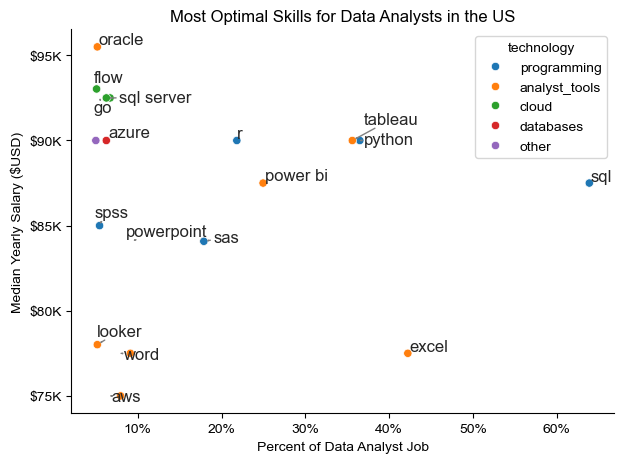

In [32]:
from adjustText import adjust_text

# fig, ax = plt.subplots()

#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

import seaborn as sns
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style='ticks')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

texts = [] #defining an emty list and later appending x, y values inside empty list

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_plot['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('Percent of Data Analyst Job')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

plt.show()